In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [3]:
# loading the file using pandas libraryy
data=pd.read_excel(r"C:\Users\Lenovo\OneDrive\Documents\ML Dataset.xlsx")

In [4]:
# Extracting coloumn1 from the data
data1=data.iloc[:,1]
print(data1)

0       0.343874
1       0.084930
2       0.216801
3       0.095572
4       0.300674
          ...   
1121    0.126331
1122    0.060391
1123    0.197136
1124    0.075891
1125    0.099571
Name: embed_1, Length: 1126, dtype: float64


In [5]:
#extracting coloumn2 from the dataset 
data2=data.iloc[:,2]
print(data2)

0       0.176382
1       0.047369
2       0.029110
3       0.157358
4       0.366119
          ...   
1121    0.084587
1122   -0.009947
1123    0.149639
1124    0.100093
1125    0.229438
Name: embed_2, Length: 1126, dtype: float64


Mean  for data1: 0.13016513112965425
Mean  for data2: 0.1034114422226938
 sigma for data1: 0.1460608227588885
 sigmafor data2: 0.17069689278001854
Distance between mean vectors : 0.02675368890696045


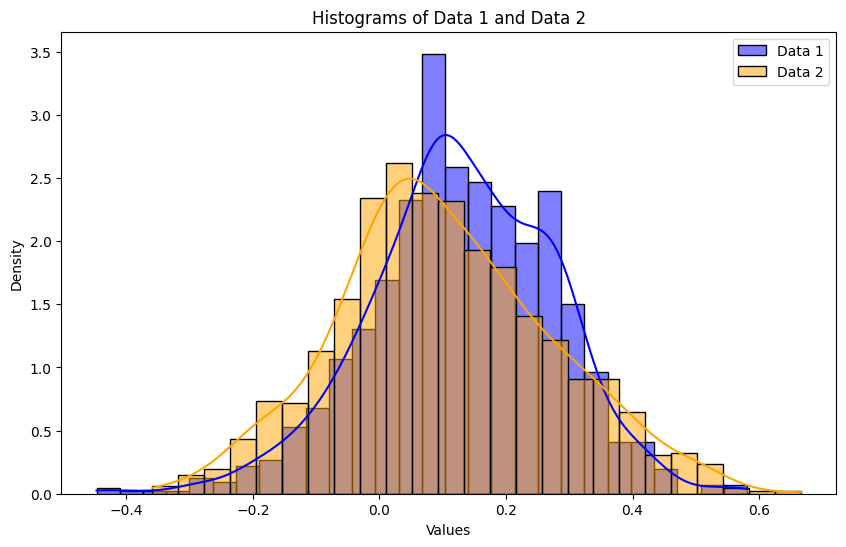

In [6]:
import seaborn as sns
# Calculating mean and variance 
mean_data1 = np.mean(data1, axis=0)
mean_data2 = np.mean(data2, axis=0)

std_data1 = np.std(data1, axis=0)
std_data2 = np.std(data2, axis=0)
# Calculating the distance between class
distance_between_classes = np.linalg.norm(mean_data1 - mean_data2)

print("Mean  for data1:", mean_data1)
print("Mean  for data2:", mean_data2)
print(" sigma for data1:", std_data1)
print(" sigmafor data2:", std_data2)
print("Distance between mean vectors :", distance_between_classes)
plt.figure(figsize=(10, 6))
# Plotting the histogram for data1 and data2
sns.histplot(data1, color='blue', kde=True, label='Data 1', stat='density')
sns.histplot(data2, color='orange', kde=True, label='Data 2', stat='density')

plt.title('Histograms of Data 1 and Data 2')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

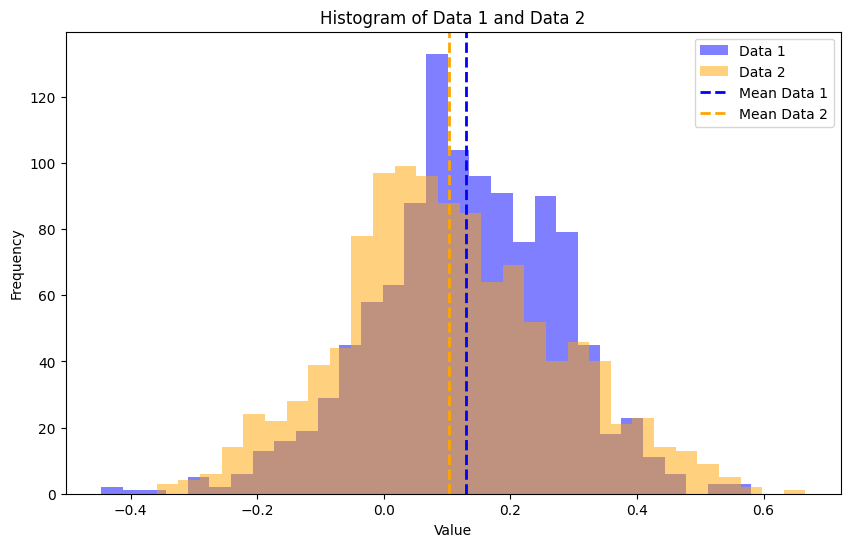

In [7]:
# Declaring the size of the plot
plt.figure(figsize=(10, 6))
# Plotting histograph of data1 and Data2 with different colors
plt.hist(data1, bins=30, alpha=0.5, color='blue', label='Data 1')
plt.hist(data2, bins=30, alpha=0.5, color='orange', label='Data 2')
# Draws a vertical line on the plot at the specified x-coordinate
plt.axvline(mean_data1, color='blue', linestyle='dashed', linewidth=2, label='Mean Data 1')
plt.axvline(mean_data2, color='orange', linestyle='dashed', linewidth=2, label='Mean Data 2')

plt.title('Histogram of Data 1 and Data 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

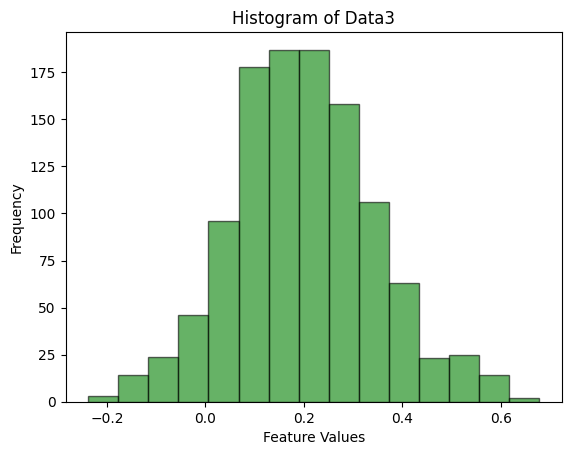

Mean: 0.2016162974265223
Variance: 0.020627186462260028


<Axes: xlabel='embed_1', ylabel='Density'>

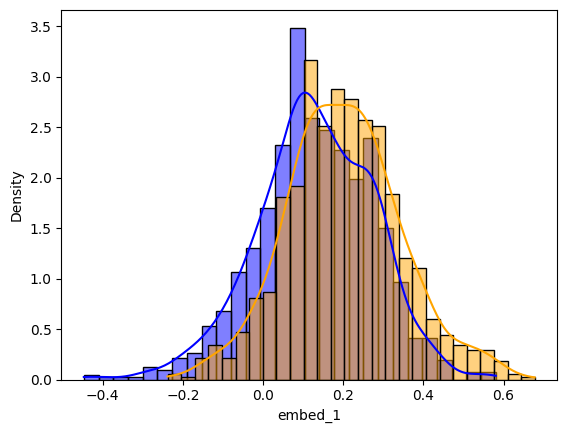

In [8]:
#Extracting coloum3 from the dataset
data3 =data.iloc[:,3]
# Plotting histograph of data3
plt.hist(data3, bins=15, color='green', edgecolor='black', alpha=0.6)
plt.title('Histogram of Data3')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.show()
# Calculating mean and variance
mean_value = np.mean(data3)
variance_value = np.var(data3)

print(f"Mean: {mean_value}")
print(f"Variance: {variance_value}")
sns.histplot(data1, color='blue', kde=True, label='Data 1', stat='density')
sns.histplot(data3, color='orange', kde=True, label='Data 2', stat='density')


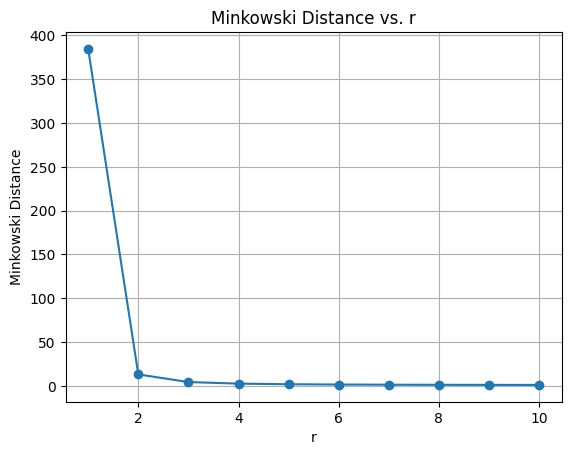

In [9]:
# Extracting athe 4th and 5th coloumn from dataset 
data4=data.iloc[:,4]
data5=data.iloc[:,5]
r_values = np.arange(1, 11)

# Calculate minkowski distance
from scipy.spatial import distance
distances = [distance.minkowski(data4,data5, p=r) for r in r_values]

plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.grid(True)
plt.show()

In [10]:
# Extracting features and target from the dataset 
features = data.iloc[:, 0:383]
target = data.iloc[:,384]
target = target.astype(int)
print(target)
print(features)
# Splitting the data into test and train data
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)

0       0
1       0
2       0
3       0
4       0
       ..
1121    5
1122    5
1123    5
1124    5
1125    5
Name: output, Length: 1126, dtype: int32
       embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0    -0.089926  0.343874  0.176382  0.169358 -0.413337 -0.276315  0.188070   
1     0.303261  0.084930  0.047369 -0.017244 -0.524733 -0.104934  0.335107   
2    -0.274291  0.216801  0.029110  0.259279 -0.655594 -0.289643  0.073369   
3     0.118676  0.095572  0.157358  0.225097 -0.632885 -0.125629  0.204013   
4     0.298772  0.300674  0.366119 -0.022142 -0.748852 -0.035268  0.277504   
...        ...       ...       ...       ...       ...       ...       ...   
1121 -0.316305  0.126331  0.084587  0.099225 -0.503260 -0.062559  0.115574   
1122 -0.342471  0.060391 -0.009947  0.156623 -0.511338 -0.070624  0.140290   
1123 -0.379174  0.197136  0.149639  0.060261 -0.347212 -0.064022  0.119379   
1124 -0.379726  0.075891  0.100093  0.118006 -0.429774 -0.140415  0.1

In [11]:
## Train a kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4171597633136095


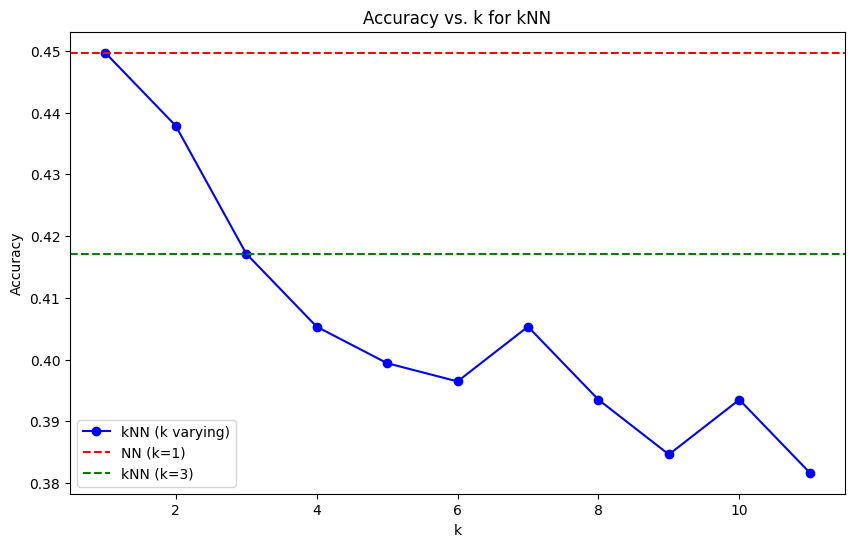

In [12]:
# Train a kNN classifier with k=1
one = KNeighborsClassifier(n_neighbors=1)
one.fit(X_train, y_train)
y_pred_one = one.predict(X_test)
accuracy_one = accuracy_score(y_test, y_pred_one)

# Train a kNN classifier with k=3
three = KNeighborsClassifier(n_neighbors=3)
three.fit(X_train, y_train)
y_pred_three = three.predict(X_test)
accuracy_knn_3 = accuracy_score(y_test, y_pred_three)

# Evaluate accuracy for different values of k
k_values = range(1, 12)
accuracy_scores_knn = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    accuracy_scores_knn.append(accuracy_knn)

# Plot the accuracy vs. k for kNN
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores_knn, marker='o', linestyle='-', color='b', label='kNN (k varying)')
plt.axhline(y=accuracy_one, linestyle='--', color='r', label='NN (k=1)')
plt.axhline(y=accuracy_knn_3, linestyle='--', color='g', label='kNN (k=3)')
plt.title('Accuracy vs. k for kNN')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()





Text(0.5, 1.0, 'Confusion Matrix')

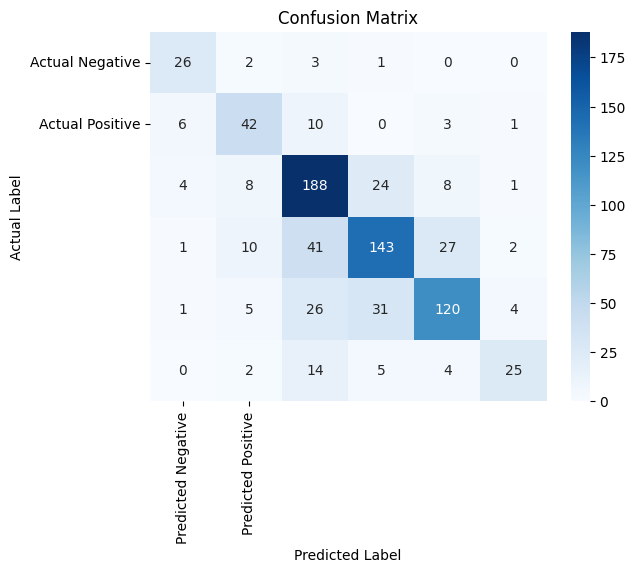

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# Calculate the confusion matrix
confm_train = confusion_matrix(y_train, y_train_pred)
# Plot the confusion matrix using seaborn heatmap
sns.heatmap(confm_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")


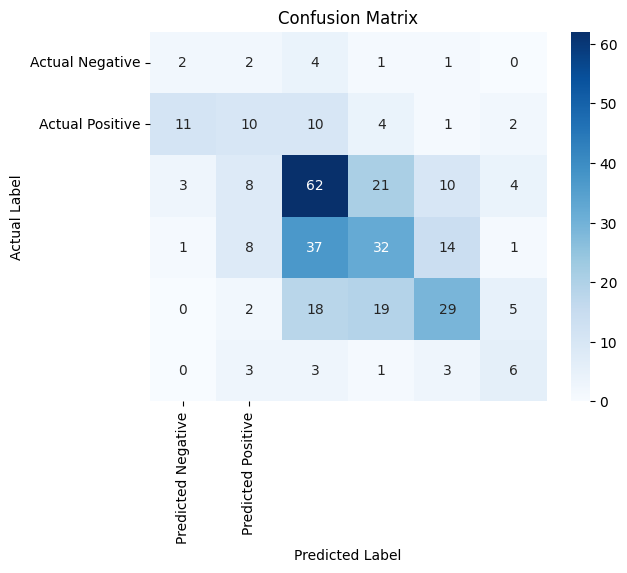

In [14]:
# Calculate the confusion matrix
confm_test = confusion_matrix(y_test, y_test_pred)
# Plot the confusion matrix using seaborn heatmap
sns.heatmap(confm_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

# Set labels for the plot
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix") 
# Display the plot
plt.show()

In [15]:
# Calucating precision, recall,f1 score for training set 
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

print("\nPrecision (Training Set):", precision_train)
print("Recall (Training Set):", recall_train)
print("F1-Score (Training Set):", f1_train)
# Calucating precision, recall,f1 score for training set 
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
# Printing results
print("\nPrecision (Test Set):", precision_test)
print("Recall (Test Set):", recall_test)
print("F1-Score (Test Set):", f1_test)


Precision (Training Set): 0.6959189274754629
Recall (Training Set): 0.6903553299492385
F1-Score (Training Set): 0.6878661022570287

Precision (Test Set): 0.42203831610738946
Recall (Test Set): 0.4171597633136095
F1-Score (Test Set): 0.41508649959530397
